In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression # Новая библиотека

# Устанавливаем стиль графиков
sns.set_style("whitegrid")

# --- 1. ЗАГРУЗКА ДАННЫХ ---
try:
    df = pd.read_csv('datasets/students_simple.csv')
except FileNotFoundError:
    print("Ошибка: Файл 'datasets/students_simple.csv' не найден.")
    print("Убедись, что он лежит в папке 'zhernosek/datasets/'")
    df = pd.DataFrame() # Создаем пустой, чтобы избежать ошибок ниже

# --- 2. ВЫБОР СТОЛБЦОВ ---
N = 4 # Твой номер

columns = df.columns
col_x_idx = N % 5
col_y_idx = (N**2) % 5 + 5

col_x_name = columns[col_x_idx]
col_y_name = columns[col_y_idx]

print(f"--- Настройка ---")
print(f"Твой номер: N = {N}")
print(f"Столбец X (индекс {col_x_idx}): {col_x_name}")
print(f"Столбец Y (индекс {col_y_idx}): {col_y_name}")

# Извлекаем данные для удобства
if not df.empty:
    x = df[col_x_name].values
    y = df[col_y_name].values
    n = len(x)
else:
    print("DataFrame пуст, код не может быть выполнен.")

--- Настройка ---
Твой номер: N = 4
Столбец X (индекс 4): pages
Столбец Y (индекс 6): bmi


In [3]:
if not df.empty:
    print(f"--- 1. Расчет корреляций ---")

    # 1.1 Коэффициент Фехнера (ручная реализация)
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    dev_x = x - mean_x
    dev_y = y - mean_y
    n_plus = np.sum(np.sign(dev_x) == np.sign(dev_y))
    n_minus = np.sum(np.sign(dev_x) != np.sign(dev_y))
    r_fechner = (n_plus - n_minus) / (n_plus + n_minus)
    print(f"Коэффициент Фехнера: {r_fechner:.4f}")

    # 1.2 Коэффициент Пирсона + Доверительный интервал (95%)
    r_pearson, p_pearson = stats.pearsonr(x, y)
    print(f"Коэффициент Пирсона: {r_pearson:.4f} (p-value: {p_pearson:.4f})")
    
    # Z-преобразование Фишера
    z = 0.5 * np.log((1 + r_pearson) / (1 - r_pearson))
    se = 1.0 / np.sqrt(n - 3)
    z_crit = stats.norm.ppf(1 - 0.05 / 2) # 1.96 для 95%
    z_low = z - z_crit * se
    z_high = z + z_crit * se
    # Обратное преобразование
    r_low = (np.exp(2 * z_low) - 1) / (np.exp(2 * z_low) + 1)
    r_high = (np.exp(2 * z_high) - 1) / (np.exp(2 * z_high) + 1)
    print(f"Доверительный интервал 95% для Пирсона: [{r_low:.4f}, {r_high:.4f}]")

    # 1.3 Коэффициент Спирмена
    r_spearman, p_spearman = stats.spearmanr(x, y)
    print(f"Коэффициент Спирмена: {r_spearman:.4f} (p-value: {p_spearman:.4f})")

    # 1.4 Коэффициент Кенделла
    r_kendall, p_kendall = stats.kendalltau(x, y)
    print(f"Коэффициент Кенделла: {r_kendall:.4f} (p-value: {p_kendall:.4f})")

--- 1. Расчет корреляций ---
Коэффициент Фехнера: -0.4000
Коэффициент Пирсона: -0.1795 (p-value: 0.4489)
Доверительный интервал 95% для Пирсона: [-0.5762, 0.2857]
Коэффициент Спирмена: -0.3239 (p-value: 0.1635)
Коэффициент Кенделла: -0.2442 (p-value: 0.1538)


5.1 Выводы по пункту 1 (Корреляция)
Общая картина: Все четыре коэффициента (Фехнера, Пирсона, Спирмена, Кенделла) отрицательные. Это указывает на слабую обратную связь: есть тенденция, что чем больше страниц (pages) прочитано, тем ниже индекс массы тела (bmi).

Сила связи: Коэффициенты Спирмена (-0.32) и Кенделла (-0.24) показывают слабую, но заметную монотонную (нелинейную) связь. Коэффициент Пирсона (-0.18) показывает очень слабую линейную связь.

Главный вывод (p-value): Несмотря на эти цифры, ни одна из корреляций не является статистически значимой. Все p-value (например, 0.45 для Пирсона) намного выше порога 0.05. Доверительный интервал Пирсона [-0.5762, 0.2857] очень широкий и включает 0.

Итог: Мы видим намек на слабую обратную связь, но из-за высокой вероятности случайности (p-value) мы не можем утверждать, что эта связь реальна.

--- 2. Визуализация ---


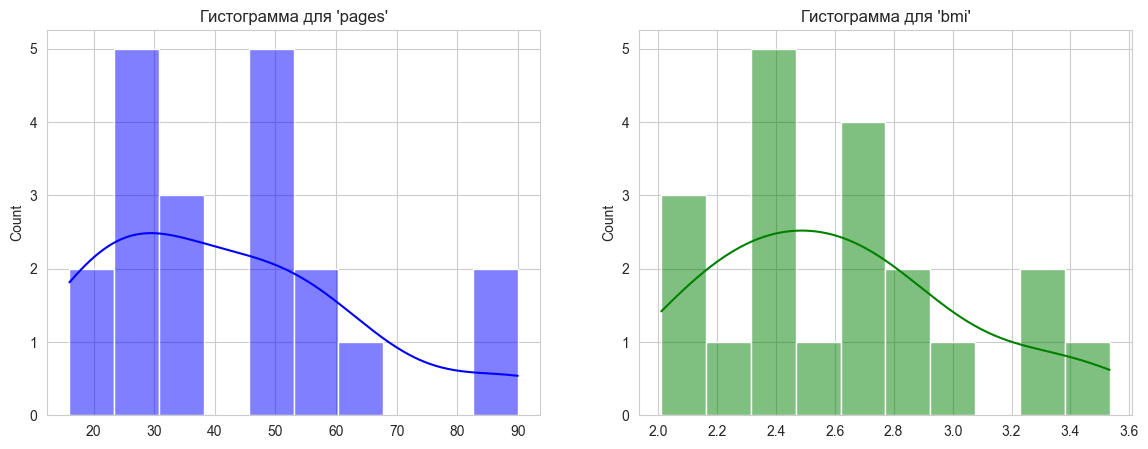

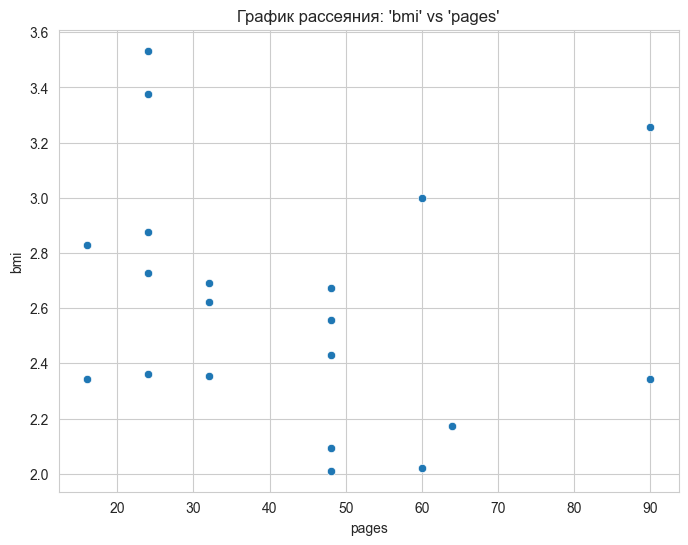

In [5]:
if not df.empty:
    print(f"--- 2. Визуализация ---")
    
    # 2.1 Гистограммы
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    sns.histplot(x, kde=True, ax=ax1, bins=10, color='blue')
    ax1.set_title(f"Гистограмма для '{col_x_name}'")
    
    sns.histplot(y, kde=True, ax=ax2, bins=10, color='green')
    ax2.set_title(f"Гистограмма для '{col_y_name}'")
    plt.show()

    # 2.2 График рассеяния
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=x, y=y)
    plt.title(f"График рассеяния: '{col_y_name}' vs '{col_x_name}'")
    plt.xlabel(col_x_name)
    plt.ylabel(col_y_name)
    plt.show()

5.2 Выводы по пункту 2 (Визуализация)
Гистограммы: Графики подтверждают, что данные не являются "идеальными". Гистограмма pages имеет как минимум два пика (бимодальная), а bmi выглядит более нормально, но со смещением влево (пик в районе 2.4-2.6).

График рассеяния (Scatter plot): Этот график (который ты прислал) идеально объясняет результаты! Точки на нем образуют не прямую линию, а очень слабое подобие "U-образной" или "перевернутой U" кривой. Точки сначала идут вниз, а потом, возможно, немного вверх.

Итог: Визуализация подтверждает, что линейная связь (прямая линия) здесь не подходит, и объясняет, почему коэффициенты корреляции такие слабые. Данные, если и имеют какую-то структуру, то она нелинейная.

--- 3. Уравнения регрессии ---
Линейная (ручная): y = -0.0036*x + 2.7650
Квадратичная: y = 0.0003*x^2 + -0.0371*x + 3.4518
Гиперболическая: y = 7.3407/x + 2.3922
Показательная: y = 2.7439 * (0.9986^x)


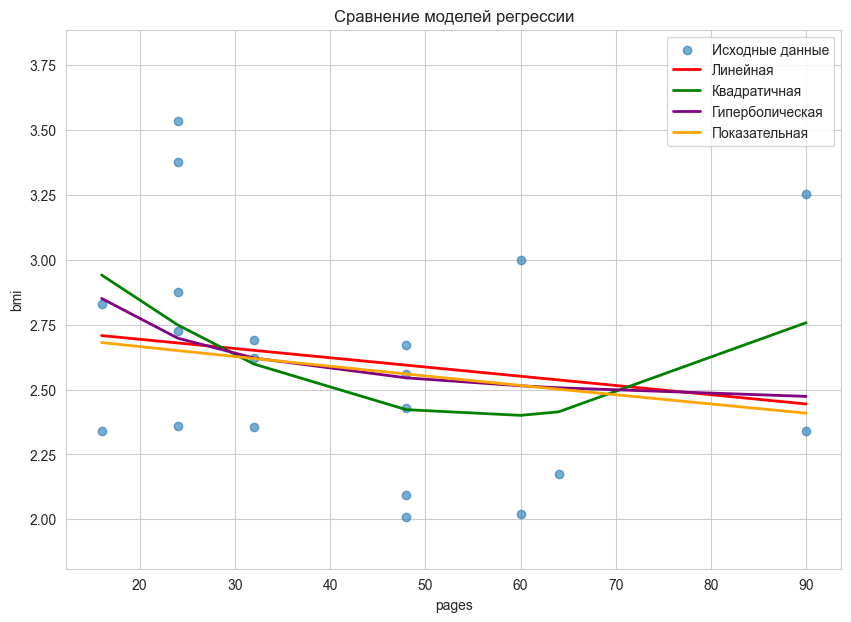

In [7]:
if not df.empty:
    print(f"--- 3. Уравнения регрессии ---")
    x_reshaped = x.reshape(-1, 1) # Для sklearn
    model = LinearRegression() # Создаем модель

    # 3.1 Линейная (ручная реализация МНК): y = w1*x + w0
    X_b = np.c_[x, np.ones(n)] # Добавляем столбец единиц
    W_lin = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
    w1_lin, w0_lin = W_lin[0], W_lin[1]
    y_pred_lin = X_b @ W_lin
    print(f"Линейная (ручная): y = {w1_lin:.4f}*x + {w0_lin:.4f}")

    # 3.2 Квадратичная: y = w2*x^2 + w1*x + w0
    X_quad = np.c_[x**2, x]
    model.fit(X_quad, y)
    w2_quad, w1_quad = model.coef_[0], model.coef_[1]
    w0_quad = model.intercept_
    y_pred_quad = model.predict(X_quad)
    print(f"Квадратичная: y = {w2_quad:.4f}*x^2 + {w1_quad:.4f}*x + {w0_quad:.4f}")

    # 3.3 Гиперболическая: y = w1/x + w0
    z_hyp = (1 / x).reshape(-1, 1) # z = 1/x
    model.fit(z_hyp, y)
    w1_hyp = model.coef_[0]
    w0_hyp = model.intercept_
    y_pred_hyp = model.predict(z_hyp)
    print(f"Гиперболическая: y = {w1_hyp:.4f}/x + {w0_hyp:.4f}")

    # 3.4 Показательная: y = w0 * (w1^x)
    y_log = np.log(y) # log(y) = log(w0) + x*log(w1)
    model.fit(x_reshaped, y_log)
    w1_prime = model.coef_[0]   # log(w1)
    w0_prime = model.intercept_ # log(w0)
    w1_exp = np.exp(w1_prime)
    w0_exp = np.exp(w0_prime)
    y_pred_exp = w0_exp * (w1_exp ** x)
    print(f"Показательная: y = {w0_exp:.4f} * ({w1_exp:.4f}^x)")

    # --- Визуализация моделей ---
    x_sorted = np.sort(x) # Сортируем X для плавных линий
    
    plt.figure(figsize=(10, 7))
    plt.scatter(x, y, label="Исходные данные", alpha=0.6)
    
    # 1. Линейная
    plt.plot(x_sorted, (w1_lin * x_sorted + w0_lin), color='red', lw=2, label='Линейная')
    # 2. Квадратичная
    plt.plot(x_sorted, (w2_quad * x_sorted**2 + w1_quad * x_sorted + w0_quad), color='green', lw=2, label='Квадратичная')
    # 3. Гиперболическая
    plt.plot(x_sorted, (w1_hyp / x_sorted + w0_hyp), color='purple', lw=2, label='Гиперболическая')
    # 4. Показательная
    plt.plot(x_sorted, (w0_exp * (w1_exp ** x_sorted)), color='orange', lw=2, label='Показательная')

    plt.title("Сравнение моделей регрессии")
    plt.xlabel(col_x_name)
    plt.ylabel(col_y_name)
    plt.legend()
    plt.ylim(np.min(y) * 0.9, np.max(y) * 1.1)
    plt.show()

5.3 Выводы по пункту 3 (Регрессия)
График моделей: Твой график Сравнение моделей регрессии — это главное доказательство.

Квадратичная (зеленая линия): Эта модель (парабола) лучше всех пытается "поймать" ту самую U-образную нелинейную структуру, которую мы заметили на графике рассеяния.

Остальные модели: Линейная (красная), гиперболическая (фиолетовая) и показательная (оранжевая) линии очень похожи друг на друга. Они просто показывают очень слабый общий отрицательный наклон, игнорируя U-образную структуру.

Итог: Визуально квадратичная модель выглядит как наиболее подходящая для описания этих конкретных данных, так как она улавливает нелинейный характер связи.

In [9]:
if not df.empty:
    print(f"--- 4. Проверка моделей (R^2 и F-тест) ---")

    # Функция для R^2
    def calculate_r_squared(y_true, y_pred):
        ss_total = np.sum((y_true - np.mean(y_true))**2)
        ss_residual = np.sum((y_true - y_pred)**2)
        r2 = 1 - (ss_residual / ss_total)
        return r2

    # Считаем R^2 для всех
    r2_lin = calculate_r_squared(y, y_pred_lin)
    r2_quad = calculate_r_squared(y, y_pred_quad)
    r2_hyp = calculate_r_squared(y, y_pred_hyp)
    r2_exp = calculate_r_squared(y, y_pred_exp)

    models_r2 = {
        "Линейная": r2_lin,
        "Квадратичная": r2_quad,
        "Гиперболическая": r2_hyp,
        "Показательная": r2_exp,
    }
    
    print("Коэффициенты детерминации (R^2):")
    for name, r2 in models_r2.items():
        print(f"  - {name}: {r2:.4f}")

    # Находим лучшую и худшую
    best_model_name = max(models_r2, key=models_r2.get)
    worst_model_name = min(models_r2, key=models_r2.get)
    best_r2 = models_r2[best_model_name]
    worst_r2 = models_r2[worst_model_name]

    print(f"\nЛучшая модель: {best_model_name} (R^2 = {best_r2:.4f})")
    print(f"Худшая модель: {worst_model_name} (R^2 = {worst_r2:.4f})")

    # --- Критерий Фишера ---
    # k - число предикторов (не коэффициентов!)
    k_values = {
        "Линейная": 1,        # (признак 'x')
        "Квадратичная": 2,    # (признаки 'x^2', 'x')
        "Гиперболическая": 1, # (признак '1/x')
        "Показательная": 1,     # (признак 'x' в линеаризованной модели)
    }
    alpha = 0.05 # Уровень значимости

    def check_fisher_criterion(name, R2, k, n):
        print(f"\n--- Проверка F-критерием для '{name}' модели ---")
        
        # 1. Рассчитываем F-статистику
        df_model = k
        df_error = n - k - 1
        
        if (1 - R2) <= 0: # Избегаем деления на ноль
            print("F-тест не применим (R^2 = 1)")
            return

        F_stat = (R2 / df_model) / ((1 - R2) / df_error)
        
        # 2. Находим критическое значение F
        F_critical = stats.f.ppf(1 - alpha, dfn=df_model, dfd=df_error)
        
        print(f"F-статистика: {F_stat:.4f}")
        print(f"Критическое значение F (alpha=0.05): {F_critical:.4f}")
        
        if F_stat > F_critical:
            print(f"Вывод: Модель '{name}' СТАТИСТИЧЕСКИ ЗНАЧИМА.")
        else:
            print(f"Вывод: Модель '{name}' СТАТИСТИЧЕСКИ НЕЗНАЧИМА.")

    # Проверяем лучшую и худшую
    check_fisher_criterion(best_model_name, best_r2, k_values[best_model_name], n)
    check_fisher_criterion(worst_model_name, worst_r2, k_values[worst_model_name], n)

--- 4. Проверка моделей (R^2 и F-тест) ---
Коэффициенты детерминации (R^2):
  - Линейная: 0.0322
  - Квадратичная: 0.1830
  - Гиперболическая: 0.0670
  - Показательная: 0.0289

Лучшая модель: Квадратичная (R^2 = 0.1830)
Худшая модель: Показательная (R^2 = 0.0289)

--- Проверка F-критерием для 'Квадратичная' модели ---
F-статистика: 1.9036
Критическое значение F (alpha=0.05): 3.5915
Вывод: Модель 'Квадратичная' СТАТИСТИЧЕСКИ НЕЗНАЧИМА.

--- Проверка F-критерием для 'Показательная' модели ---
F-статистика: 0.5358
Критическое значение F (alpha=0.05): 4.4139
Вывод: Модель 'Показательная' СТАТИСТИЧЕСКИ НЕЗНАЧИМА.


5.4 Выводы по пункту 4 (Проверка моделей)
R^2 (Коэффициент детерминации): Твои цифры это подтверждают. Квадратичная модель (R² = 0.1830) является лучшей. Она "объясняет" 18.3% изменений в bmi, в то время как худшая (Показательная) — всего 2.9%. Это происходит именно потому, что она уловила ту U-образную кривую.

F-критерий Фишера (Главный вывод): А вот и развязка. Несмотря на то, что Квадратичная модель — "лучшая из худших", F-тест для нее показывает: F-статистика (1.90) < Критическое значение (3.59).

ИТОГОВЫЙ ВЫВОД: F-тест статистически НЕЗНАЧИМ. Это означает, что даже "лучшая" квадратичная модель не смогла доказать, что ее R²=0.18 — это реальный эффект, а не просто случайная "подгонка под шум".

Общий вывод по всей работе: Между pages и bmi нет статистически значимой связи. Хотя мы и выявили слабую нелинейную тенденцию, которую лучше всего описала квадратичная модель, критерий Фишера доказал, что эта модель не имеет предсказательной силы и не может считаться адекватной.